In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import k_means
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel('Данные по банкам с нулями.xls')

In [3]:
data.head()

,Основные операциии крупнейших российских банков,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,"На 01.02.2008, млн. руб.",Активы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Пассивы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Банк,Чистые активы,Денежные средства,Депозиты в Банке России,Межбанковские кредиты (МБК) резидентам,МБК нерезидентам,"Средства, предоставленные государству","Средства, предоставленные пред приятиям","Средства, предоставленные физи ческим лицам","Средства, предоставленные нере зидентам",...,"МБК, полученные от резидентов","МБК, полученные от нерезиденто в",Текущие счета государства,Текущие счета предприятий,Прочие текущие счета,Депозиты предприятий,Депозиты физических лиц,Депозиты нерезидентов,Выпущенные долговые обязательс тва,Собственные средства
1.0,АБСОЛЮТ БАНК,130178,1708.62,0,6093.7,7883.06,0,59243.6,25877.3,7881.18,...,8019.97,51978.2,0,8109.72,2532.03,2908.52,14273.7,10745.5,10374.1,6848.02
2.0,АВАНГАРД,39334.4,675.025,0,4554.9,482.261,0,18628.1,7788.75,1620.93,...,5822.17,3341.91,0,8189.54,2300.51,5737.54,4285.74,70.366,2801.1,1767.43


In [4]:
data.columns = data.iloc[2,:]
data.index = data.iloc[:,0].values
data = data.iloc[3:-1,1:]

In [5]:
data.head()

nan,Чистые активы,Денежные средства,Депозиты в Банке России,Межбанковские кредиты (МБК) резидентам,МБК нерезидентам,"Средства, предоставленные государству","Средства, предоставленные пред приятиям","Средства, предоставленные физи ческим лицам","Средства, предоставленные нере зидентам","Кредиты, не погашенные в срок",...,"МБК, полученные от резидентов","МБК, полученные от нерезиденто в",Текущие счета государства,Текущие счета предприятий,Прочие текущие счета,Депозиты предприятий,Депозиты физических лиц,Депозиты нерезидентов,Выпущенные долговые обязательс тва,Собственные средства
АБСОЛЮТ БАНК,130178,1708.62,0,6093.7,7883.06,0,59243.6,25877.3,7881.18,136.336,...,8019.97,51978.2,0,8109.72,2532.03,2908.52,14273.7,10745.5,10374.1,6848.02
АВАНГАРД,39334.4,675.025,0,4554.9,482.261,0,18628.1,7788.75,1620.93,282.107,...,5822.17,3341.91,0,8189.54,2300.51,5737.54,4285.74,70.366,2801.1,1767.43
АГРОИМПУЛЬС,22096.4,622.314,5950,1831.03,0,0,6207.21,3763.58,0,105.452,...,150,0,0,11701.4,1246.35,3059.12,3781.62,570.865,949.349,261.312
АЙСИАЙСИАЙ БАНК ЕВРАЗИЯ,15890.4,192.443,0,2439.96,4682.24,56.4,1831,1567.75,1236.32,5.474,...,630,14075.1,0,249.552,74.59,50.748,169.008,26.861,2.09,195.291
АК БАРС,158967,2179.58,0,803.941,8789.23,619.908,88130.3,21874.4,305.955,1073.61,...,4684.53,16862.3,2590.36,12552.2,7538.47,33452.3,24326,10651.5,19122.8,2397.36


In [6]:
X = np.array(data).astype('float32')
std = np.std(X, axis=0).reshape((1,-1))
mean = np.mean(X, axis=0).reshape((1,-1))
X -= mean
X /= std

In [7]:
def log_likelihood(clust, X):
    centroids, clustids = clust[0], clust[1]
    
    loglik = 0
    for clustid, centr in enumerate(centroids):
        in_clust = X[clustids == clustid,:]
        if len(in_clust) <= 1:
            continue
        squares = np.sum((in_clust - centr)**2, axis=1)
        ss = np.mean(squares)
        loglik -= np.log(ss) * len(in_clust)
    return loglik

In [8]:
likes = []
for n_clusters in range(1,17):
    kmeans = k_means(n_init=600, n_jobs=4, n_clusters=n_clusters, X=X)
    likes.append(log_likelihood(kmeans, X))

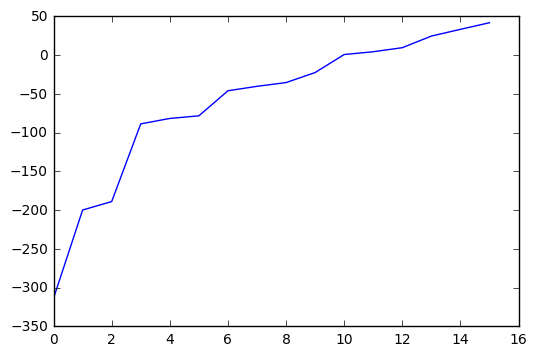

In [9]:
plt.plot(likes)
plt.show()

### likelihood не изменяется значительно после 6 кластеров - наверное, оптимальное число где-то от 4 до 6

In [10]:
likes = []
bics = []
aics = []
for n_clusters in range(1,27):
    mixture = GaussianMixture(n_init=600, n_components=n_clusters)
    mixture.fit(X)
    likes.append(mixture.score(X))
    bics.append(mixture.bic(X))
    aics.append(mixture.aic(X))

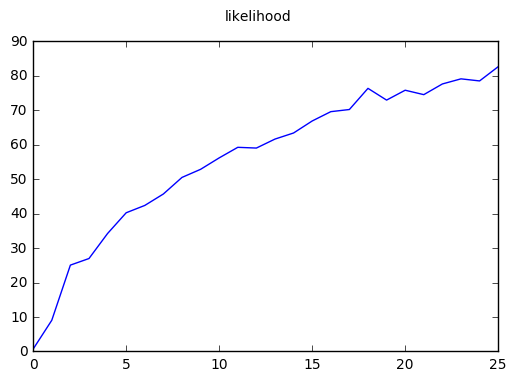

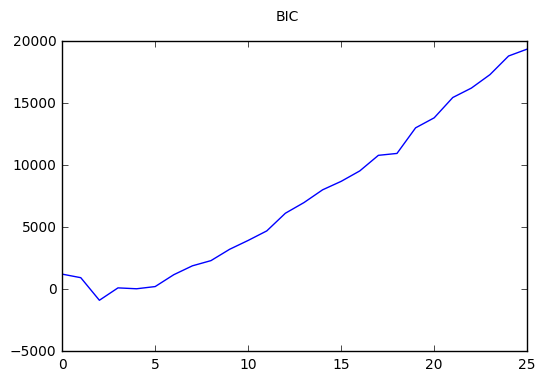

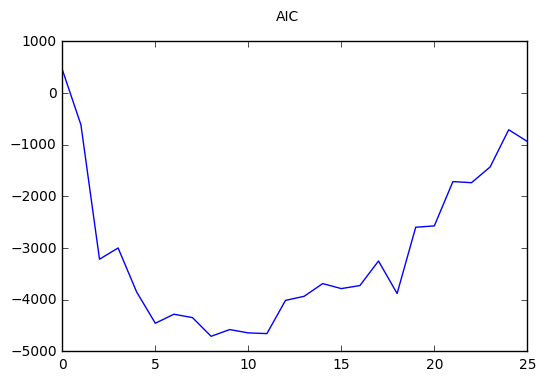

In [11]:
plt.title('likelihood')
plt.plot(likes)
plt.show()

plt.title('BIC')
plt.plot(bics)
plt.show()

plt.title('AIC')
plt.plot(aics)
plt.show()

### судя по критериям и log likelihood, для смеси гауссиан всё примерно так же - от 4 до 6

### попробуем различные методы построения иерархической кластеризации:

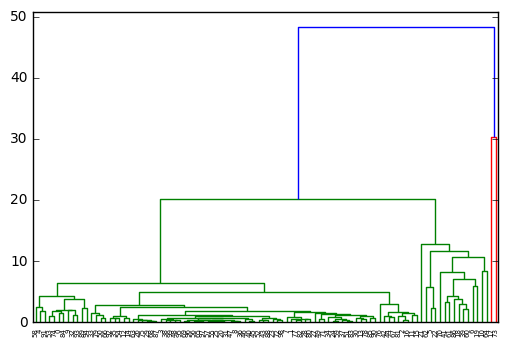

In [12]:
link = linkage(X, 'ward')
dendrogram(link)
plt.show()

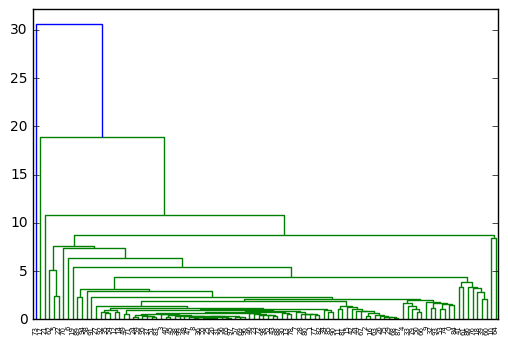

In [55]:
link = linkage(X, 'weighted', metric='minkowski')
dendrogram(link)
plt.show()

In [14]:
def get_pcs(X):
    cov = np.matmul(X.T, X)
    values, vectors = np.linalg.eig(cov)
    # vectors[:,i] - i-й собственный вектор
    order = np.argsort(values)[::-1]
    vectors = vectors[:,order]
    return np.matmul(X, vectors)

In [15]:
mixture = GaussianMixture(n_init=600, n_components=6)
mixture.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=600, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [16]:
mixture.predict(X)

array([0, 4, 4, 4, 0, 4, 5, 4, 4, 0, 3, 4, 4, 4, 4, 4, 4, 2, 5, 5, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 5, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 4, 4, 1, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 3, 4, 4, 0, 4, 4,
       4, 0, 0, 4, 4, 4, 4, 4])

In [17]:
pcs = get_pcs(X)
clusters = mixture.predict(X)

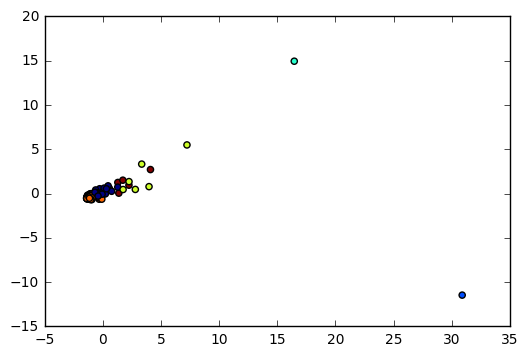

In [18]:
plt.scatter(pcs[:,0], pcs[:,1], c=clusters)
plt.show()

In [19]:
select = np.logical_and(pcs[:,0] < 4, pcs[:,1] < 4)

### 6 кластеров в смеси гауссиан:

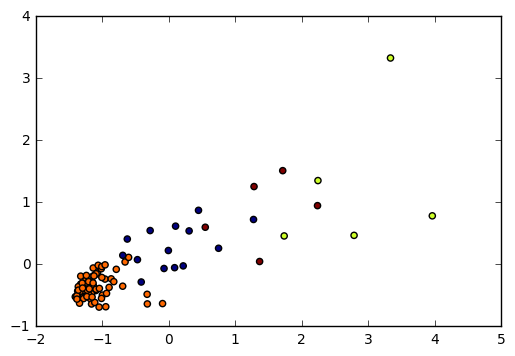

In [20]:
plt.scatter(pcs[select,0], pcs[select,1], c=clusters[select])
plt.show()

### Кластеры в иерархической кластеризации:

In [40]:
clusters = fcluster(link,t=1.15, criterion='inconsistent')

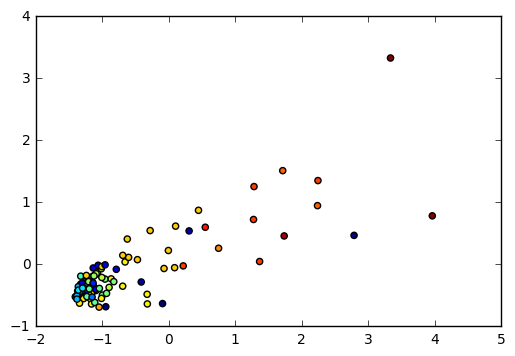

In [41]:
plt.scatter(pcs[select,0], pcs[select,1], c=clusters[select])
plt.show()

In [60]:
link = linkage(X, 'ward')
clusters = fcluster(link,t=9.15, criterion='maxclust')

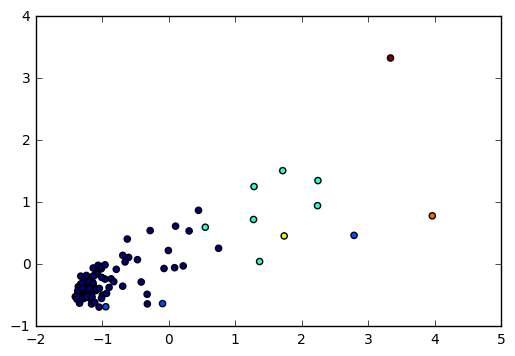

In [61]:
plt.scatter(pcs[select,0], pcs[select,1], c=clusters[select])
plt.show()

In [9]:
mixture = GaussianMixture(n_init=600, n_components=6)
mixture.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=600, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
mixture.predict([np.mean(X,axis=0)])

array([5])

In [13]:
mixture.predict(X)

array([5, 5, 5, 5, 5, 0, 3, 5, 5, 5, 4, 0, 5, 5, 5, 0, 5, 2, 4, 4, 5, 3, 0,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 4, 4, 3, 5, 3, 5, 5, 5, 5,
       5, 3, 5, 5, 1, 4, 5, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5])

### средний банк относится к 5-му кластеру, самому большому